#Consegna
2. Cercare uno o più dataset interessanti su www.dati.gov.it e creare un Jupyter notebook che
scarichi via HTTP i dati e li usi (con o senza l’uso di Dataframe)
#Svolgimento
Per prima cosa importo i pacchetti utili:

In [1]:
import pandas as pd
import requests
from matplotlib import pyplot as plt
import seaborn as sns

Copio l'url del dataset scelto sui laureati a Milano

In [2]:
url = "https://dati.comune.milano.it/dataset/ae03c361-051b-4f75-8174-f343b198602d/resource/f5a5cc0f-b95c-47b2-b380-7bf2c55079fb/download/ds764_laureati_per_genere_anno_solare_2013.json"
response = requests.get(url)

Estraggo i dati in formato json e creo il dataframe tramite pandas.

In [3]:
data = response.json()
df = pd.DataFrame(data)

In [4]:
print(df)

    ANNO_SOLARE  CODICE_ATENEO          NOME_ATENEO Sesso  LAUREATI_TOTALE
0          2013           1501               Milano     F             6489
1          2013           1501               Milano     M             3966
2          2013           1502   Milano Politecnico     F             3595
3          2013           1502   Milano Politecnico     M             6009
4          2013           1503       Milano Bocconi     F             2031
5          2013           1503       Milano Bocconi     M             2167
6          2013           1504     Milano Cattolica     F             6423
7          2013           1504     Milano Cattolica     M             3097
8          2013           1505          Milano IULM     F              717
9          2013           1505          Milano IULM     M              262
10         2013           1508  Milano San Raffaele     F              316
11         2013           1508  Milano San Raffaele     M              158
12         2013          

Vedo le informazioni più importanti sul dataset tramite:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ANNO_SOLARE      14 non-null     int64 
 1   CODICE_ATENEO    14 non-null     int64 
 2   NOME_ATENEO      14 non-null     object
 3   Sesso            14 non-null     object
 4   LAUREATI_TOTALE  14 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 692.0+ bytes


In [6]:
df.describe()

,ANNO_SOLARE,CODICE_ATENEO,LAUREATI_TOTALE
count,14.0,14.000000,14.000000
mean,2013.0,1504.571429,2935.357143
std,0.0,2.874672,2244.480670
min,2013.0,1501.000000,158.000000
25%,2013.0,1502.250000,1042.000000
50%,2013.0,1504.000000,2632.000000
75%,2013.0,1507.250000,3936.500000
max,2013.0,1509.000000,6489.000000


Controllo se ci sono dati nan:

In [7]:
df.isnull().sum()

ANNO_SOLARE        0
CODICE_ATENEO      0
NOME_ATENEO        0
Sesso              0
LAUREATI_TOTALE    0
dtype: int64

Non ci sono dati nulli. Quindi non ho bisogno di ripulire i dati.

Vediamo la percentuale di laureati per diversi atenei di Milano nel 2013

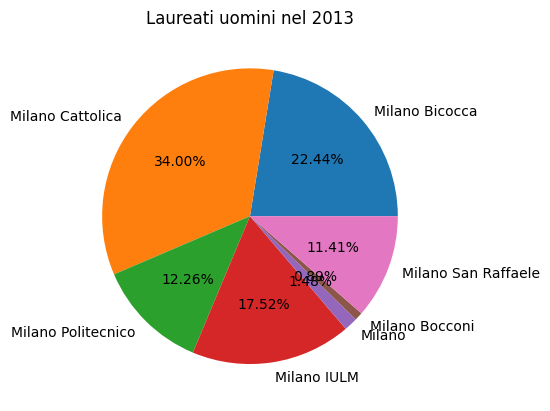

In [13]:
labels_0 = list(set(df['NOME_ATENEO']))
sizes_0 = list(df['LAUREATI_TOTALE'].loc[df['Sesso']=='M'])
plt.title('Laureati uomini nel 2013')
plt.pie(sizes_0,labels=labels_0,autopct="%.2f%%")
plt.show()

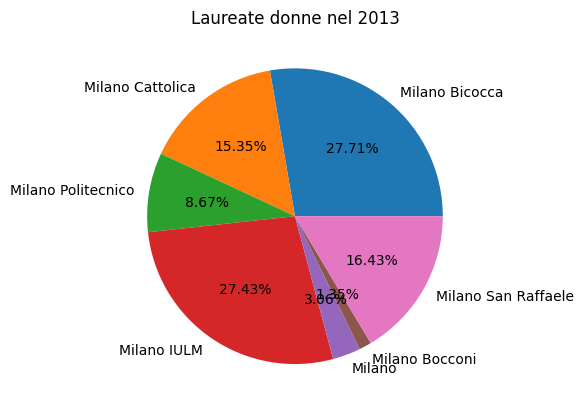

In [14]:
labels_1 = list(set(df['NOME_ATENEO']))
sizes_1 = list(df['LAUREATI_TOTALE'].loc[df['Sesso']=='F'])
plt.title('Laureate donne nel 2013')
plt.pie(sizes_1,labels=labels_1,autopct="%.2f%%")
plt.show()

Vediamo la differenza di genere dei laureati:

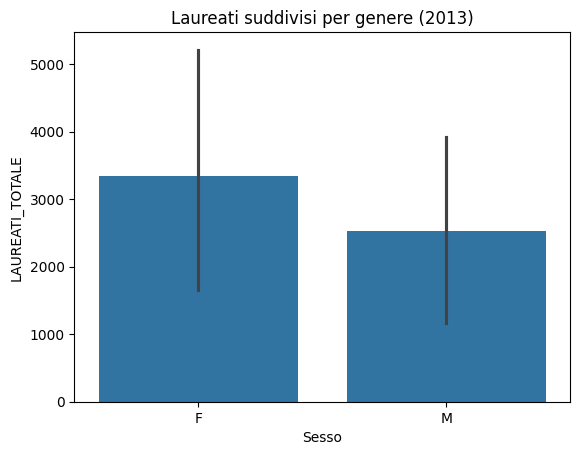

In [19]:
sns.barplot(
x="Sesso",
y="LAUREATI_TOTALE",
data=df
)
plt.title("Laureati suddivisi per genere (2013)")
plt.show()


Sono più le laureate donne rispetto agli uomini nel 2013! Vediamo cosa succede nel 2021:

In [11]:
url2 = "https://dati.comune.milano.it/dataset/c8cc2240-f6d2-4b8f-a230-1fb22a3ea190/resource/5b2ff8f3-2005-49d3-a8dd-6288a2327a1f/download/ds2714_laureati_negli_atenei_milanesi.json"
resp2 = requests.get(url2)
data2 = resp2.json()
df2 = pd.DataFrame(data2)
df2

,AnnoS,AteneoCOD,AteneoNOME,Femmine,Maschi,Laureati_totale
0,2021,1501,Milano,7218,4473,11691
1,2021,1502,Milano Politecnico,4651,8177,12828
2,2021,1503,Milano Bocconi,2030,2687,4717
3,2021,1504,Milano Cattolica,7565,3763,11328
4,2021,1505,Milano IULM,1464,469,1933
5,2021,1508,Milano San Raffaele,475,233,708
6,2021,1509,Milano Bicocca,4744,2844,7588


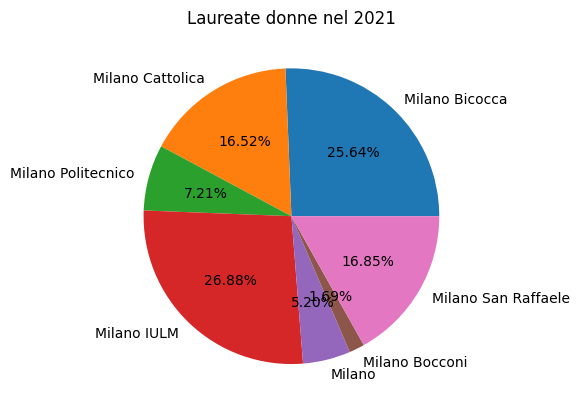

In [12]:
labels2 = list(set(df2['AteneoNOME']))
sizes2 = list(df2['Femmine'])
plt.title('Laureate donne nel 2021')
plt.pie(sizes2,labels=labels2,autopct="%.2f%%")
plt.show()

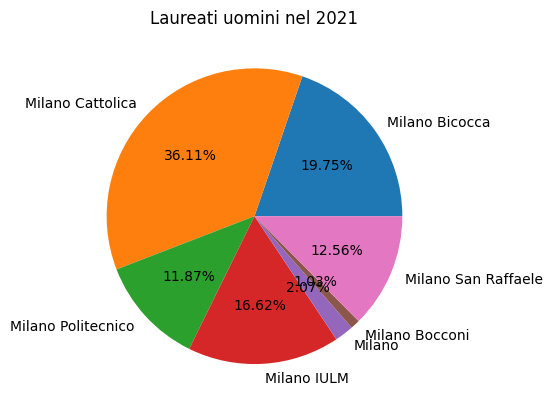

In [15]:
labels3 = list(set(df2['AteneoNOME']))
sizes3 = list(df2['Maschi'])
plt.title('Laureati uomini nel 2021')
plt.pie(sizes3,labels=labels3,autopct="%.2f%%")
plt.show()

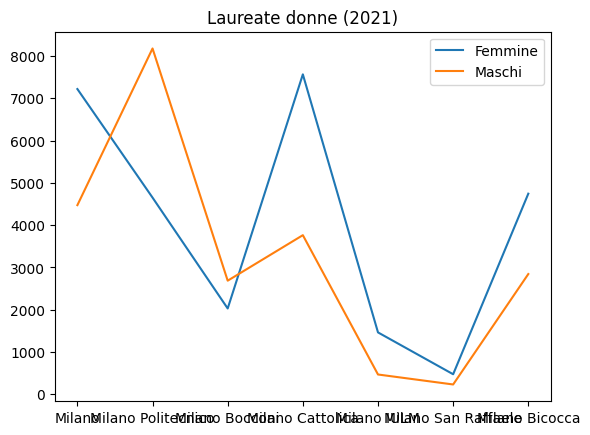

In [33]:
plt.plot(df2['AteneoNOME'],df2['Femmine'])
plt.plot(df2['Maschi'])
plt.legend(['Femmine','Maschi'])
plt.title("Laureati donne e uomini nei vari atenei milanesi (2021)")
plt.show()

Si osserva che nei diversi atenei la percentuale di donne e di uomini laureati è differente.